In [17]:
from skimage import io, exposure, img_as_float
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Denoising Image

In [28]:
img = io.imread('dataset/test2.png')
print(img.shape)

(904, 1204, 3)


<Figure size 7200x7200 with 0 Axes>

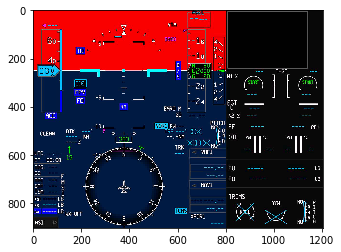

<Figure size 7200x7200 with 0 Axes>

In [36]:
# img = img[400:700,100:300]
plt.imshow(img)

In [13]:
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)

orig = img_as_float(img)
sigma_est = estimate_sigma(orig, multichannel=True, average_sigmas=True)
sigma_est

0.002763028989694749

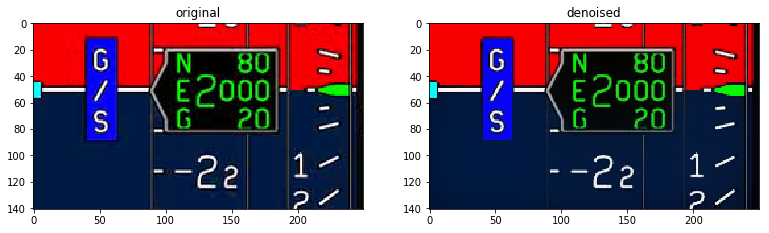

In [14]:
new = denoise_bilateral(orig, sigma_color=0.05, sigma_spatial=15,
                multichannel=True)

fig, ax = plt.subplots(1, 2, figsize=(13,10))
ax[0].imshow(orig)
ax[0].set_title('original')
ax[1].imshow(new)
ax[1].set_title('denoised')

fig.savefig('test.jpg')

## Apply for the entire image

In [23]:
img = io.imread('dataset/test2.png')
print(img.shape)

(904, 1204, 3)


In [26]:
from skimage.util import apply_parallel

def slide_window(arr):
    new = denoise_bilateral(orig, sigma_color=0.05, sigma_spatial=15,
                multichannel=True)
    return new

print('image shape: ', img.shape)
img = apply_parallel(slide_window, img, 140)
print('image shape: ', img.shape)

image shape:  (904, 1204, 3)
image shape:  (987, 2250, 3)


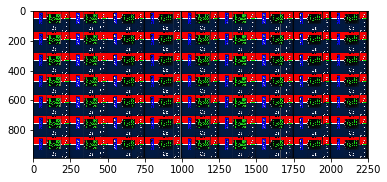

In [27]:
plt.imshow(img)